In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import numpy as np
import os

In [2]:
path = './bki/flatw/M21_1/'
files = [f for f in os.listdir(path) if f.endswith('.fw')]

In [3]:
def getfile(fname):
    nptype=np.uint16
    shape = [1004*1344*35]
    with open(fname,'rb') as fid:
        data = np.fromfile(fid, count=np.prod(shape),dtype = nptype)
    return np.reshape(data, [1004,1344,35])

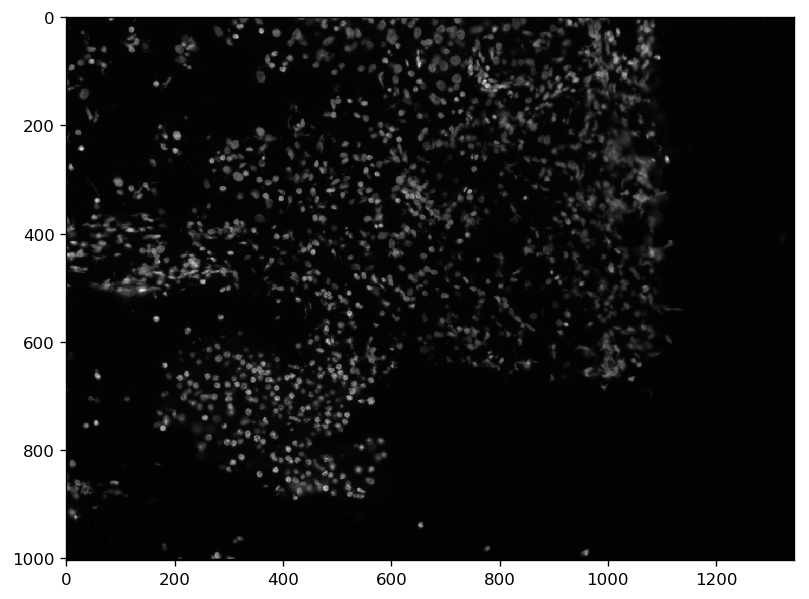

In [9]:
# read the 4th image
a = getfile(path+files[4])

# validate by showing the-th layer
fig = plt.figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
plt.imshow(a[:,:,0], cmap=plt.get_cmap('gray'))

In [6]:
# now permute the dimensions to pixel first ordering
b = np.transpose(a,(2,1,0))

# turn it into a 35-dimensional vector
b = np.reshape(b,[35,1004*1344])

# compute the correlation matrix
c = np.matmul(b,b.T)

In [7]:
c.shape

(35, 35)

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=8)
pca.fit(c.T)
print("E = U:", pca.components_.T)
print("Lambda:", pca.explained_variance_)

E = U: [[ 6.18610049e-02 -1.07057210e-01  3.31101816e-02 -7.76014191e-02
   1.47538801e-01  1.93817542e-01 -1.23298489e-01 -6.93270064e-02]
 [ 3.03868146e-02  7.79746601e-02  2.30517938e-01 -4.41130780e-02
  -9.12341261e-02 -2.04385959e-01  7.32157755e-02  1.29627725e-01]
 [ 1.20186227e-01  1.71636245e-02 -1.87833457e-01  3.27224561e-01
   1.02517676e-02  2.76177579e-01  5.41396596e-02  4.37185510e-02]
 [ 2.48009523e-01 -7.46463601e-03  8.61335370e-02 -9.11673221e-02
  -1.04712173e-01  7.02700130e-02  5.16516445e-02 -3.13815942e-02]
 [-9.24202212e-02  4.54357703e-02 -1.10061874e-01 -2.03508950e-01
  -1.89830914e-01  4.60715133e-02  1.17352335e-01 -1.86570284e-01]
 [-1.12648422e-01 -5.00632894e-02 -5.28854747e-03 -5.78992181e-02
  -6.81552941e-04  2.68159792e-01 -3.37838331e-01 -5.02838201e-02]
 [-2.34499257e-01 -2.42544969e-01 -2.71408371e-01  1.35717972e-01
   2.90634406e-03 -1.64849086e-01 -1.30633898e-01  1.90889474e-01]
 [-8.09646979e-02 -2.84464484e-02 -5.80901892e-02 -3.72840240e

In [19]:
XX = pca.fit_transform(c.T).T
XX.shape

(8, 35)

In [20]:
X = np.matmul(XX,b)
X.shape

(8, 1349376)